Victor Mikhaylov, vmikhayl@ias.edu<br>Institute for Advanced Study, 2021-2022

In [1]:
import os
import pickle
import numpy as np
import csv
import time

from matplotlib import pyplot as plt

import utils

cwd=os.getcwd()
structure_dir=cwd+'/data/experimental_structures/processed_updated'
date_cutoff='2018-04-30' #AlphaFold training set cutoff

In [3]:
#load pmhc data

with open(structure_dir+'/pmhcs.pckl','rb') as f:
    pmhcs=pickle.load(f)
print('pmhcs:',len(pmhcs))
print(pmhcs[0].keys())

with open(structure_dir+'/pmhcs_seq_clusters.pckl','rb') as f:
    pmhcs_seq_clusters=pickle.load(f)
print('pmhcs seq clusters:',len(pmhcs_seq_clusters))
print(pmhcs_seq_clusters[0].keys())

with open(structure_dir+'/pmhcs_CA_clusters.pckl','rb') as f:
    pmhcs_CA_clusters=pickle.load(f)
print('pmhcs CA clusters:',len(pmhcs_CA_clusters))
print(pmhcs_CA_clusters[0].keys())

pmhcs: 896
dict_keys(['P', 'M', 'class', 'pdbs', 'date', 'pep_pdbnum', 'id', 'bound', 'cluster_seq', 'cluster_CA'])
pmhcs seq clusters: 453
dict_keys(['id', 'pmhc_ids', 'pdbs', 'date'])
pmhcs CA clusters: 453
dict_keys(['id', 'pmhc_ids', 'pdbs', 'date'])


# choose pep lengths and binding registers

## explore binding registers

In [4]:
#binding registers by MHC class and pep length
registers={'I':{},'II':{}}
for x in pmhcs_seq_clusters:
    if x['date']<date_cutoff: #don't look in the test set
        pmhc=pmhcs[x['pmhc_ids'][0]]
        cl=pmhc['class']
        pep=pmhc['P']
        pdbnums='|'.join(pep['data']['pdbnum'])
        pdbnums='('+pdbnums.replace(' ','')+')'
        registers[cl].setdefault(len(pep['data']),[]).append(pdbnums)
for cl in registers:
    print(f'class {cl}:')
    for l in np.sort(list(registers[cl].keys())):
        print(f'length {l}: {len(registers[cl][l])}')
        utils.print_hist(registers[cl][l])
    print()

class I:
length 8: 35
(1|2|3|4|5|7|8|9) 34
(2|3|4|5|6|7|8|9)  1
length 9: 172
(09|1|2|3|4|5|7|8|9)   1
(1|2|3|4|5|6|7|8|9)  169
(1|2|3|4|5|7|8|9|10)   1
(2|3|4|5|51|6|7|8|9)   1
length 10: 53
(09|1|2|3|4|5|6|7|8|9)  4
(1|2|3|4|5|51|6|7|8|9) 47
(1|2|3|4|5|6|7|8|9|10)  2
length 11: 14
(1|2|3|4|5|51|59|6|7|8|9)  13
(2|3|4|5|51|52|59|6|7|8|9)  1
length 12: 7
(09|1|2|3|4|5|51|59|6|7|8|9) 1
(1|2|3|4|5|51|52|59|6|7|8|9) 5
(1|2|3|4|5|51|59|6|7|8|9|10) 1
length 13: 4
(1|2|3|4|5|51|52|58|59|6|7|8|9)  3
(1|2|3|4|5|7|8|9|10|11|12|13|14) 1
length 14: 1
(1|2|3|4|5|51|52|53|58|59|6|7|8|9) 1
length 15: 2
(1|2|3|4|5|51|52|53|57|58|59|6|7|8|9) 2
length 16: 1
(1|2|3|4|5|51|52|53|54|57|58|59|6|7|8|9) 1
length 18: 1
(1|2|3|4|5|7|8|9|10|11|12|13|14|15|16|17|18|19) 1
length 19: 1
(1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19) 1
length 20: 2
(09|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19) 1
(1|2|3|4|5|51|6|7|8|9|10|11|12|13|14|15|16|17|18|19) 1

class II:
length 10: 2
(09|1|2|3|4|5|6|7|8|9)  1
(2|3|4|

## plot pep length distribution

In [18]:
#plot peptide length distribution

with open('/data/vmikhayl/custom_packages/mhc_binding_data/data/source/mhc_ligand_full.csv') as f:
    f_csv=csv.reader(f)
    x=next(f_csv)
    y=next(f_csv)
    z=next(f_csv)
for i,a in enumerate(zip(x,y,z)):
    print('{:3d} || {:s} || {:s} || {:s}'.format(i,*a))

  0 || Reference || Assay IRI || http://www.iedb.org/assay/26
  1 || Reference || Reference IRI || http://www.iedb.org/reference/274
  2 || Reference || Type || Literature
  3 || Reference || PubMed ID || 15448372
  4 || Reference || Authors || Yi-Hsiang Huang; Mi-Hua Tao; Cheng-Po Hu; Wan-Jr Syu; Jaw-Ching Wu
  5 || Reference || Journal || J Gen Virol
  6 || Reference || Date || 2004
  7 || Reference || Title || Identification of novel HLA-A*0201-restricted CD8+ T-cell epitopes on hepatitis delta virus.
  8 || Reference || Submission ID || 
  9 || Epitope || Epitope IRI || http://www.iedb.org/epitope/31803
 10 || Epitope || Object Type || Linear peptide
 11 || Epitope || Description || KLEDLERDL
 12 || Epitope || Starting Position || 26
 13 || Epitope || Ending Position || 34
 14 || Epitope || Non-peptidic epitope IRI || 
 15 || Epitope || Antigen Name || large delta antigen
 16 || Epitope || Antigen IRI || http://www.ncbi.nlm.nih.gov/protein/AAG26087.1
 17 || Epitope || Parent Protei

In [25]:
def _read_column(i):
    t0=time.time()
    column=[]
    with open('/data/vmikhayl/custom_packages/mhc_binding_data/data/source/mhc_ligand_full.csv') as f:
        f_csv=csv.reader(f)
        next(f_csv)
        next(f_csv)
        for line in f_csv:
            column.append(line[i])
    print('total:',len(column))
    print('completed in {:5.1f} s'.format(time.time()-t0))    
    return np.array(column)

In [24]:
species=_read_column(39)
utils.print_hist(species)

completed in  57.7 s
B6.ERAAP null                                                    1201
Canis lupus familiaris (dog)                                      419
Chlorocebus aethiops (African green monkey)                        12
Cricetulus griseus (Chinese hamster)                                1
Equus caballus (domestic horse)                                    24
Gallus gallus (chicken)                                           126
Homo sapiens                                                     3650
Homo sapiens (human)                                          2718259
Murine polyomavirus strain A3 (Mouse polyomavirus (strain 3))       5
Mus musculus                                                     3217
Mus musculus &micro;MT                                            234
Mus musculus (C57BL/6 X BALB/c) H2bm8                               5
Mus musculus (mouse)                                            48161
Mus musculus B10 X 129                                              2

In [26]:
assay_method=_read_column(79)
utils.print_hist(assay_method)

total: 3235984
completed in  57.8 s
Edman degradation                         1136
T cell recognition                         150
binding assay                              420
cellular MHC                               116
cellular MHC/T cell inhibition            1335
cellular MHC/competitive/fluorescence     9762
cellular MHC/competitive/radioactivity     460
cellular MHC/direct/fluorescence         12610
cellular MHC/direct/radioactivity          137
cellular MHC/mass spectrometry         2292883
coelution                                  150
lysate MHC                                  11
lysate MHC/direct/fluorescence             155
lysate MHC/direct/radioactivity            255
mass spectrometry                       583425
purified MHC                              2864
purified MHC/competitive/fluorescence    45325
purified MHC/competitive/radioactivity  140493
purified MHC/direct/fluorescence         89803
purified MHC/direct/phage display          325
purified MHC/direct/radi

In [34]:
t0=time.time()
methods_keep=['cellular MHC/mass spectrometry']#,'mass spectrometry','secreted MHC/mass spectrometry']
peplens={'I':[],'II':[]}
with open('/data/vmikhayl/custom_packages/mhc_binding_data/data/source/mhc_ligand_full.csv') as f:
    f_csv=csv.reader(f)
    next(f_csv)
    next(f_csv)
    for line in f_csv:
        cl=line[98]
        if (line[79] in methods_keep) and (cl in peplens):
            peplens[cl].append(len(line[11]))
print('completed in {:5.1f} s'.format(time.time()-t0))
for k,v in peplens.items():
    print(k,len(v))

#convert to hist
fractions={}
for k,v in peplens.items():
    N=len(v)
    v=np.array(v)
    len_u=np.sort(np.unique(v))
    fractions[k]=[len_u,np.array([np.sum(v==l) for l in len_u])/N]

completed in  59.0 s
I 1527586
II 761305


In [38]:
#cumulative fractions: f(l<=l0)
fractions_cumul={}
for k,v in fractions.items():
    fractions_cumul[k]=[v[0],[np.sum(v[1][:i+1]) for i in range(len(v[1]))]]

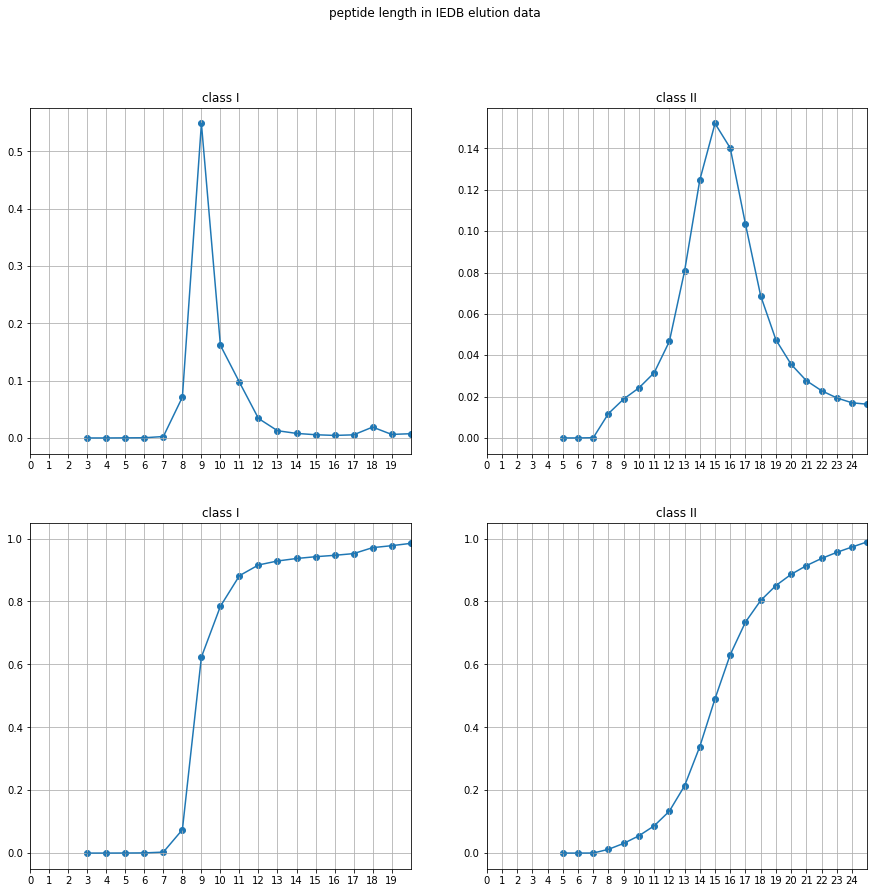

In [49]:
xmaxI,xmaxII=20,25
plt.figure(figsize=(15,14))
plt.subplot(221)
plt.scatter(*fractions['I'])
plt.plot(*fractions['I'])
plt.grid()
plt.xlim(0,xmaxI)
plt.xticks(range(xmaxI))
plt.title('class I')
plt.subplot(222)
plt.scatter(*fractions['II'])
plt.plot(*fractions['II'])
plt.grid()
plt.xlim(0,xmaxII)
plt.xticks(range(xmaxII))
plt.title('class II')
plt.subplot(223)
plt.scatter(*fractions_cumul['I'])
plt.plot(*fractions_cumul['I'])
plt.grid()
plt.xlim(0,xmaxI)
plt.xticks(range(xmaxI))
plt.title('class I')
plt.subplot(224)
plt.scatter(*fractions_cumul['II'])
plt.plot(*fractions_cumul['II'])
plt.grid()
plt.xlim(0,xmaxII)
plt.xticks(range(xmaxII))
plt.title('class II')
plt.suptitle('peptide length in IEDB elution data')
plt.show()

In [53]:
for x in list(zip(*fractions_cumul['I']))[:20]:
    print('{:2d} {:4.2f}'.format(*x))

 3 0.00
 4 0.00
 5 0.00
 6 0.00
 7 0.00
 8 0.07
 9 0.62
10 0.78
11 0.88
12 0.92
13 0.93
14 0.94
15 0.94
16 0.95
17 0.95
18 0.97
19 0.98
20 0.98
21 0.99
22 0.99


In [54]:
for x in list(zip(*fractions_cumul['II']))[:30]:
    print('{:2d} {:4.2f}'.format(*x))

 5 0.00
 6 0.00
 7 0.00
 8 0.01
 9 0.03
10 0.06
11 0.09
12 0.13
13 0.21
14 0.34
15 0.49
16 0.63
17 0.73
18 0.80
19 0.85
20 0.89
21 0.91
22 0.94
23 0.96
24 0.97
25 0.99
26 0.99
27 0.99
28 0.99
29 1.00
30 1.00
31 1.00
32 1.00
33 1.00
34 1.00
